ปฏิบัติการครั้งที่ 1 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ **เมื่อเสร็จแล้วให้ทำการ share** จากนั้นส่ง link มาใน mango canvas

ในขั้นตอนแรก ขอให้ download ไฟล์ที่

http://donlapark.pages.dev/229351/data/housing.csv

In [4]:
import pandas as pd #dataframes
import numpy as np #matrices
import matplotlib.pyplot as plt #for plotting

%matplotlib inline

!wget http://donlapark.pages.dev/229351/data/housing.csv

housing = pd.read_csv("housing.csv")

housing.head(20)

--2025-06-26 02:08:25--  http://donlapark.pages.dev/229351/data/housing.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://donlapark.pages.dev/229351/data/housing.csv [following]
--2025-06-26 02:08:25--  https://donlapark.pages.dev/229351/data/housing.csv
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/csv]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.06s   

2025-06-26 02:08:25 (22.4 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


## Basic data exploration

In [5]:
housing.shape

(20640, 10)

In [3]:
print(housing.to_string())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value ocean_proximity
0        -122.23     37.88                41.0        880.0           129.0       322.0       126.0         8.3252            452600.0        NEAR BAY
1        -122.22     37.86                21.0       7099.0          1106.0      2401.0      1138.0         8.3014            358500.0        NEAR BAY
2        -122.24     37.85                52.0       1467.0           190.0       496.0       177.0         7.2574            352100.0        NEAR BAY
3        -122.25     37.85                52.0       1274.0           235.0       558.0       219.0         5.6431            341300.0        NEAR BAY
4        -122.25     37.85                52.0       1627.0           280.0       565.0       259.0         3.8462            342200.0        NEAR BAY
5        -122.25     37.85                52.0        919.0           213.0       413.0       

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Which variable has missing data?

In [8]:
housing =housing.dropna()

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [10]:
housing.describe() #โชว์ค่าstatทั้งหมด

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Exercise 1

1. Download ไฟล์ข้อมูลที่
  http://donlapark.pages.dev/229351/data/Advertising.csv
  ซึ่งเป็นข้อมูลของผลการขายสินค้าอย่างหนึ่ง (Sales) กับการโฆษณาผ่านทาง TV, Radio, Newspaper
2. สร้าง dataframe ชื่อว่า **Ads** โดยใช้ข้อมูลชุดนี้
3. ดูข้อมูล 5 แถวแรกของ `Ads`
4. ตรวจสอบว่ามีข้อมูลที่หายไปหรือไม่
5. แสดงค่าสถิติพรรณนา (Descriptive statistics) ของตัวแปรต่างๆ

In [82]:
# code here
!wget http://donlapark.pages.dev/229351/data/Advertising.csv
Ads = pd.read_csv("Advertising.csv")
Ads.head(5)

--2025-06-26 02:57:20--  http://donlapark.pages.dev/229351/data/Advertising.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://donlapark.pages.dev/229351/data/Advertising.csv [following]
--2025-06-26 02:57:20--  https://donlapark.pages.dev/229351/data/Advertising.csv
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3870 (3.8K) [text/csv]
Saving to: ‘Advertising.csv.5’

Advertising.csv.5   100%[===================>]   3.78K  --.-KB/s    in 0s      

2025-06-26 02:57:20 (40.6 MB/s) - ‘Advertising.csv.5’ saved [3870/3870]



,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [85]:
Ads.info() # No missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [86]:
Ads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Your answers here:

## Calling, indexing & modifying dataframes

In [12]:
# calling a column
housing['longitude']

,longitude
0,-122.23
1,-122.22
2,-122.24
3,-122.25
4,-122.25
...,...
20635,-121.09
20636,-121.21
20637,-121.22
20638,-121.32


`ocean_proximity` is categorical. Let's count its values.

In [ ]:
housing["ocean_proximity"].value_counts()

## Basic statistics of a variable

In [ ]:
print("Mean: ",housing["total_rooms"].mean())
print("Standard deviation: ",housing["total_rooms"].std())
print("Maximum: ",housing["total_rooms"].max())
print("Minimum: ",housing["total_rooms"].min())

In [ ]:
housing[["longitude", "latitude", "housing_median_age"]]

In [ ]:
housing.loc[0]

## Extracting a subset of dataframe

In [24]:
housing.loc[1:3, ["longitude","latitude"]]


,longitude,latitude
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85


In [21]:
housing.iloc[2:5,:]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Selecting rows based on conditions

In [35]:
housing[housing['total_bedrooms'] == 200]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
364,-122.14,37.75,33.0,1334.0,200.0,579.0,202.0,6.8323,255900.0,NEAR BAY
429,-122.28,37.88,52.0,1193.0,200.0,506.0,207.0,4.1912,254500.0,NEAR BAY
625,-122.17,37.71,38.0,890.0,200.0,481.0,198.0,3.2440,179800.0,NEAR BAY
769,-122.09,37.65,35.0,1184.0,200.0,572.0,194.0,4.7143,193800.0,NEAR BAY
1801,-122.35,37.92,36.0,921.0,200.0,585.0,236.0,1.9224,94000.0,NEAR BAY
3284,-122.79,39.08,23.0,952.0,200.0,321.0,128.0,1.5208,89000.0,INLAND
3420,-118.42,34.28,35.0,822.0,200.0,1197.0,203.0,3.2865,133300.0,<1H OCEAN
4321,-118.35,34.08,52.0,1003.0,200.0,514.0,204.0,3.8472,395700.0,<1H OCEAN
4421,-118.26,34.07,52.0,830.0,200.0,701.0,189.0,2.7625,232100.0,<1H OCEAN
5096,-118.30,33.97,42.0,944.0,200.0,567.0,190.0,2.6311,124100.0,<1H OCEAN


In [39]:
# housing[(housing['longitude']>-122) & (housing['latitude']>=40)]
housing[(housing["total_bedrooms"] >-122) & (housing[ "latitude"] >=40)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1102,-121.54,40.06,17.0,858.0,262.0,47.0,27.0,2.4028,67500.0,INLAND
1850,-124.17,41.80,16.0,2739.0,480.0,1259.0,436.0,3.7557,109400.0,NEAR OCEAN
1851,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,NEAR OCEAN
1852,-124.23,41.75,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0,NEAR OCEAN
1853,-124.21,41.77,17.0,3461.0,722.0,1947.0,647.0,2.5795,68400.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
19802,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND
19803,-123.22,40.16,27.0,1848.0,449.0,396.0,150.0,2.8472,41300.0,INLAND
19804,-123.48,40.34,19.0,518.0,108.0,216.0,80.0,2.7083,64500.0,INLAND
19805,-123.43,40.22,20.0,133.0,35.0,87.0,37.0,3.6250,67500.0,INLAND


## Exercise 2

ในข้อต่อไปนี้ ให้นับแถวและคอลัมน์เริ่มจาก 0
1. แสดงค่าสูงสุดของข้อมูลที่อยู่ในแถวที่ 200-400 ของตัวแปร `total_bedrooms`
2. แสดง 3 คอลัมน์สุดท้ายของพื้นที่ที่มีจำนวนห้องนอน (`total_bedrooms`) มากกว่า 900 ห้อง

In [98]:
# code here โจทย์1
housing.loc[200:400, "total_bedrooms"].max()

2048.0

In [124]:
#โจทย์2
housing[housing["total_bedrooms"] >= 900].iloc[:,-3:]

,median_income,median_house_value,ocean_proximity
1,8.3014,358500.0,NEAR BAY
95,2.0096,130000.0,NEAR BAY
96,2.8345,183800.0,NEAR BAY
98,1.2185,170000.0,NEAR BAY
99,2.6104,193100.0,NEAR BAY
...,...,...,...
20563,3.1250,132500.0,INLAND
20567,5.3064,165000.0,INLAND
20569,4.1997,133400.0,INLAND
20603,1.3375,59600.0,INLAND


## Plotting

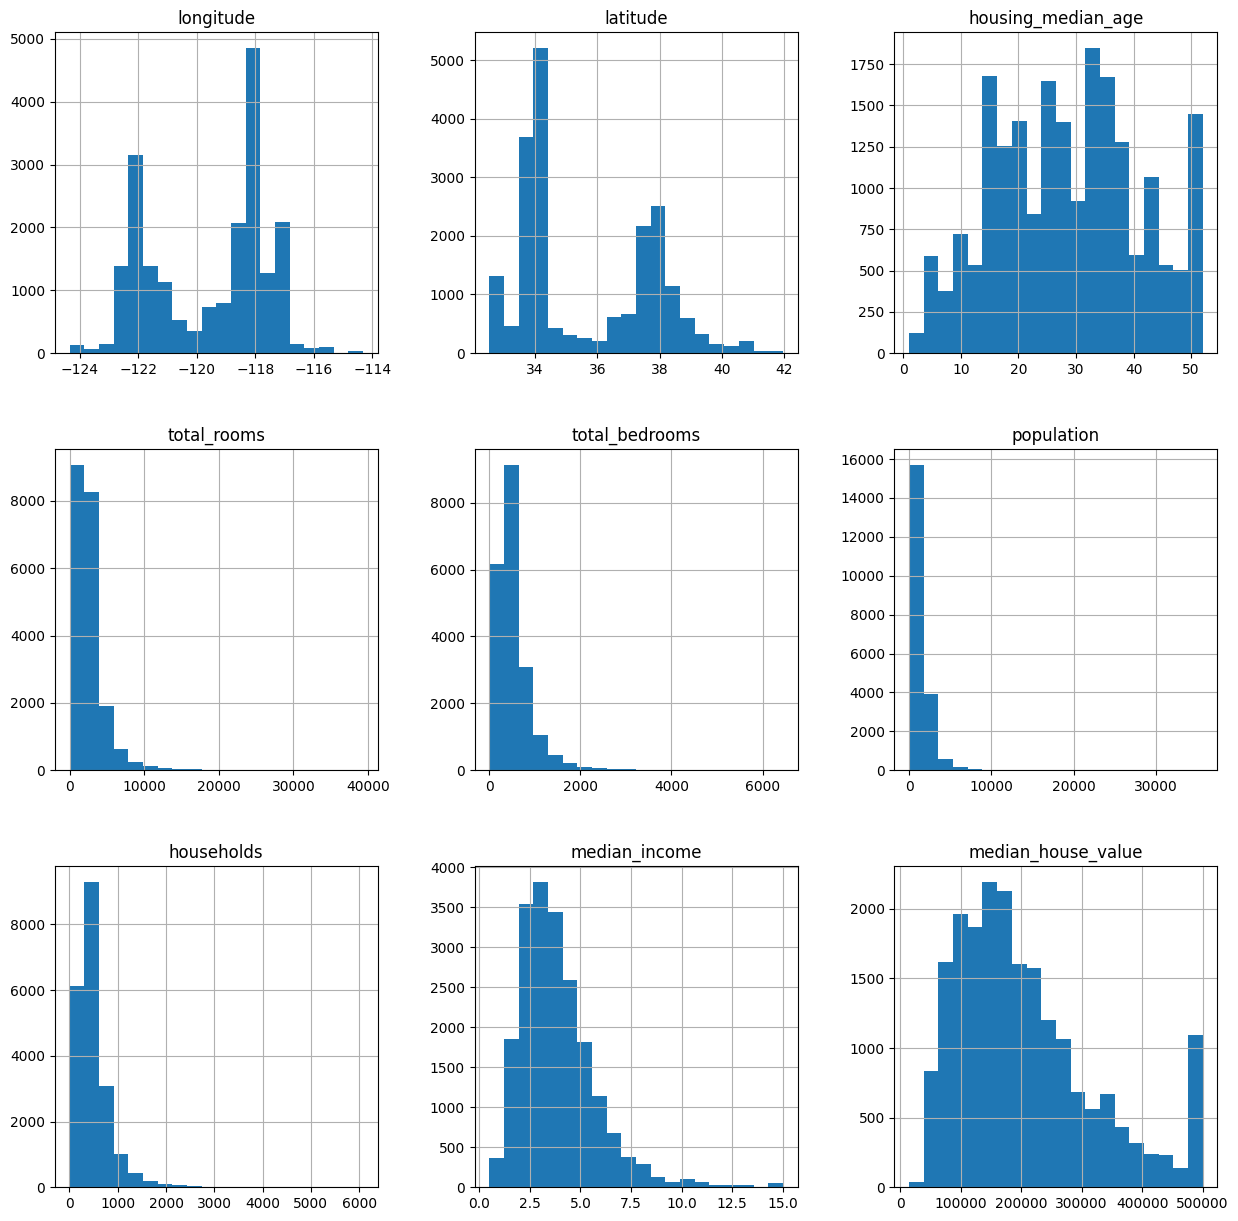

In [45]:
housing.hist(bins=20, figsize=(15,15))
plt.show()

In [ ]:
housing.head(3)

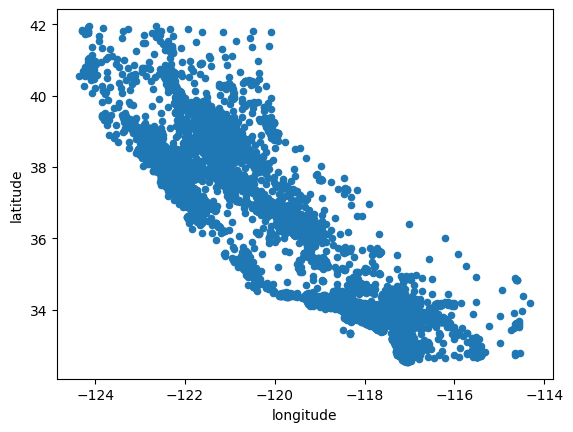

In [46]:
housing.plot.scatter(x="longitude", y="latitude");

<Axes: xlabel='longitude', ylabel='latitude'>

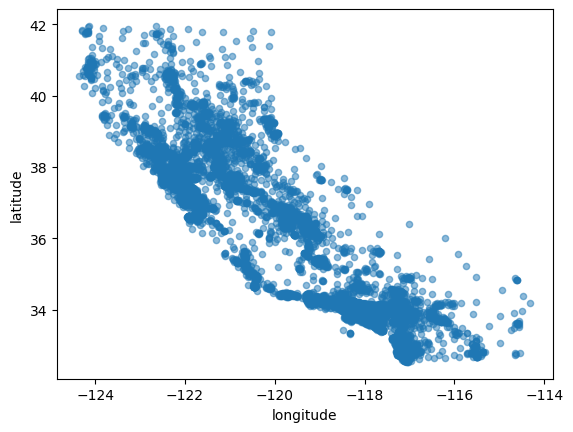

In [49]:
housing.plot.scatter(x="longitude", y="latitude", alpha=0.5)

In [83]:
corr_matrix = housing.iloc[:,:-1].corr()

corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


### Grouping

พิจารณา Anscombe dataset ข้างล่างนี้

In [52]:
import seaborn as sns

df = sns.load_dataset('anscombe')

In [53]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [54]:
groups = df.groupby('dataset')

In [57]:
groups.get_group('I')

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [58]:
dataset_I = groups.get_group('I')

In [59]:
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [63]:
housing["total_rooms"].sort_values()

,total_rooms
3126,2.0
12286,6.0
16171,8.0
5916,11.0
73,12.0
...,...
12201,30450.0
6057,32054.0
9880,32627.0
10309,37937.0


## Exercise 3

1. คำนวณค่า mean, standard deviation และ correlation matrix ของแต่ละกลุ่ม
2. สร้าง scatter plot ของแต่ละกลุ่มด้วย `groups.plot.scatter(...)`
3. จากข้อ 1 และข้อ 2 จงบอกว่าการศึกษาค่า summary statistics (mean, s.d., correlation) อย่างเดียวเพียงพอกับการศึกษาข้อมูลชุดหนึ่งหรือไม่ เพราะเหตุใด

In [107]:
groups.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26


In [112]:
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [113]:
groups.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


In [114]:
groups.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

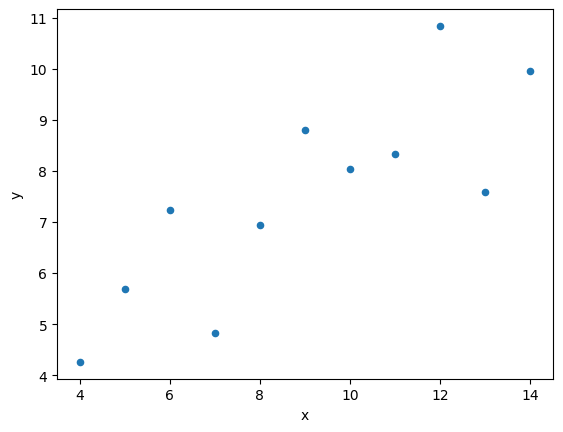

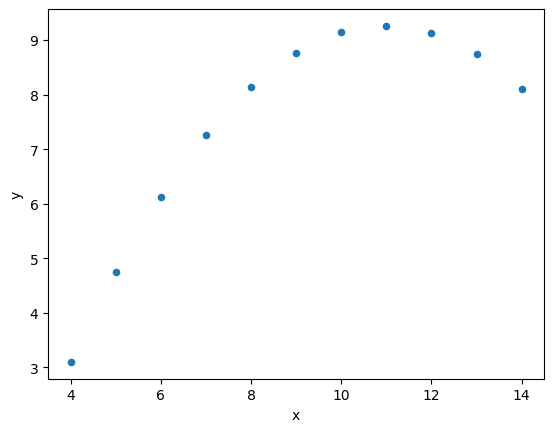

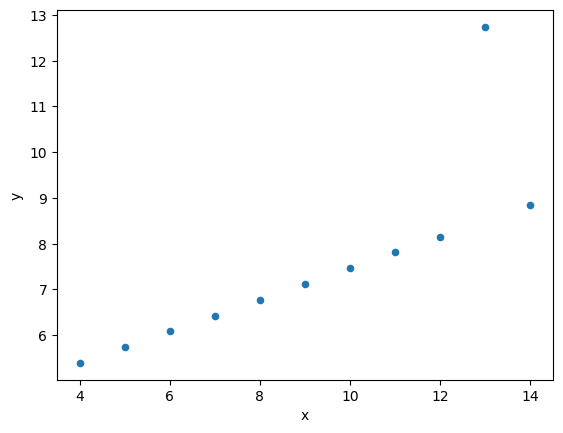

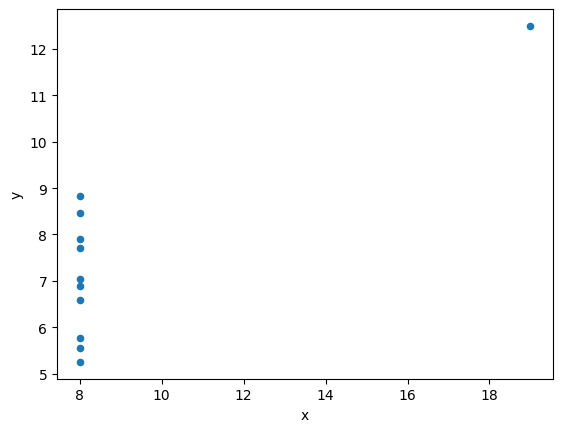

In [116]:
scat_plot =groups.plot.scatter(x="x", y="y")

**อธิบาย**

จากการวัดค่าและการคำนวณ พบว่า ค่าเฉลี่ยของตัวแปร x ในทั้ง 4 กลุ่มมีค่าเท่ากันที่ 9 ขณะที่ ค่าเฉลี่ยของตัวแปร y อยู่ที่ประมาณ 7.500 ในทุกกลุ่มเช่นกัน ดังที่แสดงไว้ในตาราง

เมื่อพิจารณาค่าความคลาดเคลื่อน (Standard Deviation) พบว่า

•	ตัวแปร x มีค่าความคลาดเคลื่อนเท่ากับ 3.316625

•	ตัวแปร y มีค่าความคลาดเคลื่อนประมาณ 2.03

ในส่วนของ เมทริกซ์สหสัมพันธ์ (Correlation Matrix) ระหว่าง x กับ y มีค่าอยู่ที่ 0.816237 ซึ่งบ่งชี้ว่า x และ y มีความสัมพันธ์กันในเชิงบวก

อย่างไรก็ตาม จากการสร้าง กราฟจุด (Scatter Plot) พบว่า รูปแบบความสัมพันธ์ระหว่าง x กับ y โดยรวมยังไม่ชัดเจน แต่ใน กลุ่มที่ 3 มีลักษณะความสัมพันธ์เชิงบวกอย่างเด่นชัด ซึ่งแตกต่างจากกลุ่มอื่น ๆ ที่มีแนวโน้มไม่สอดคล้องกันนัก










